In [1]:
# 구글 드라이브에 있는 파일 가져오기
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import pandas as pd
train = pd.read_csv('/content/drive/MyDrive/학교자료/4-2/정보검색/팀프로젝트/balanced_train_data.csv')
test = pd.read_csv('/content/drive/MyDrive/학교자료/4-2/정보검색/팀프로젝트/preprocessed_test_data.csv')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


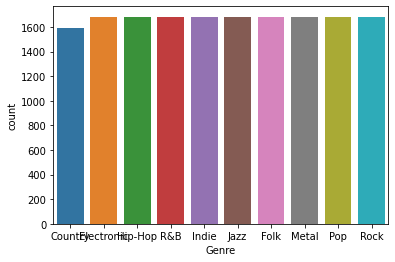

In [3]:
import seaborn as sns
sns.countplot(train['Genre'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


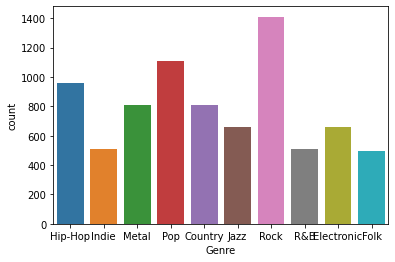

In [4]:
import seaborn as sns
sns.countplot(test['Genre'])

In [5]:
import numpy as np
# X_train, y_train 형태로 만들기
# X_train
X_train = []
for lyric in train['Lyrics']:
  words = lyric.split()
  X_train.append(words)

# y_train
y_train = np.array(train['Genre'])

# X_test
X_test = []
for lyric in test['Lyrics']:
  words = lyric.split()
  X_test.append(words)

# y_test
y_test = np.array(test['Genre'])

In [6]:
# 정수 인코딩
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
print('단어집합의 크기: ', len(tokenizer.word_index))

단어집합의 크기:  52008


In [7]:
# 등장 빈도수가 THRESHOLD 미만인 단어가 얼만큼의 비중을 차지하는지 확인
def GetRareWordRatio(vocab, threshold):
  total_cnt = len(vocab.word_index)
  rare_cnt = 0
  total_freq = 0
  rare_freq = 0

  for key, value in vocab.word_counts.items():
    total_freq += value
    if (value < threshold):
      rare_cnt += 1
      rare_freq += value
  
  print('단어 집합(vocabulary)의 크기 :',total_cnt)
  print('등장 빈도가 %s번 미만인 희귀 단어의 수: %s'%(threshold, rare_cnt))
  print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
  print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

In [11]:
# threshold = 5 확인
GetRareWordRatio(tokenizer, 5)

단어 집합(vocabulary)의 크기 : 52008
등장 빈도가 5번 미만인 희귀 단어의 수: 34755
단어 집합에서 희귀 단어의 비율: 66.82625749884633
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 1.285983740310148


In [12]:
vocab_size = 52008 - 34755 + 2
print('vocab_size: ', vocab_size)

vocab_size:  17255


In [13]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token = 'OOV')
tokenizer.fit_on_texts(X_train)

In [14]:
X_train = tokenizer.texts_to_sequences(X_train)
for v in X_train[:5]:
  print(v)

[11, 509, 1830, 1307, 8134, 126, 622, 147, 36, 1781, 12, 3, 73, 45, 144, 163, 11, 509, 1830, 1307, 8134, 126, 622, 8, 10, 867, 64, 30, 509, 540, 2, 385, 8, 10, 69, 2, 236, 62, 7, 427, 222, 673, 509, 52, 141, 7, 222, 384, 54, 19, 290, 6, 7314, 4610, 28, 1, 12041, 5, 6533, 1422, 532, 15, 3, 4610, 36, 236, 62, 3, 696, 5, 1426, 2, 263, 78, 2, 290, 6, 42, 491, 7, 222, 738, 49, 15, 1, 36, 7, 996, 117, 1308, 5, 12042, 8, 386, 3, 739, 254, 75, 11, 382, 290, 6, 764, 5, 125, 14, 2, 52, 438, 28, 7, 117, 106, 160, 15, 3, 977, 15, 509, 13, 9, 2, 182, 134, 7, 757, 380, 850, 41, 5, 8, 1481, 109, 14, 147, 558, 6, 232, 1362, 1157, 17, 41, 530, 10, 149, 509, 552, 6028, 758, 1108, 1028, 139, 28, 104, 3416, 964, 768, 2, 56, 170, 366, 151, 106, 160, 11, 719, 550, 10, 139, 682, 13, 3, 3283, 5, 59, 56, 52, 3, 399, 6, 175, 13, 321, 1422, 2, 558, 11, 231, 673, 7, 757, 380, 850, 11, 904, 5, 2, 123, 201, 15, 3, 1, 117, 387, 2, 456, 456, 263, 193, 509, 2, 174, 393, 528, 2, 929, 121, 36, 100, 162, 13, 3, 327, 794,

In [15]:
X_test = tokenizer.texts_to_sequences(X_test)
for v in X_test[:5]:
  print(v)

[532, 1188, 659, 196, 273, 11739, 15, 1711, 8139, 11, 327, 81, 2, 57, 85, 79, 75, 3, 641, 2014, 914, 763, 2, 558, 37, 2, 52, 930, 17, 11, 231, 5, 1292, 247, 34, 13698, 2, 18, 511, 427, 115, 5, 2, 40, 11, 3185, 775, 5, 1, 11, 2522, 10, 911, 378, 6, 50, 343, 2, 43, 7, 117, 1, 22, 1655, 1415, 29, 4408, 32, 79, 21, 78, 2, 659, 11, 54, 5, 2, 57, 14859, 7, 7036, 2, 161, 3, 938, 453, 104, 1433, 510, 1373, 15, 429, 17, 3, 2326, 29, 109, 37, 8, 10, 49, 13, 3, 317, 388, 3, 453, 21, 149, 13, 1864, 14, 327, 4355, 6, 3, 971, 21, 1298, 13, 959, 1841, 6, 16286, 14, 13615, 114, 12, 23, 275, 71, 32, 21, 3, 532, 1774, 1181, 15, 3, 11056, 191, 22, 222, 2405, 6, 2065, 196, 1, 855, 3, 938, 453, 3, 267, 173, 2, 314, 6, 43, 5, 32, 400, 21, 499, 2641, 2, 921, 3, 2326, 3, 1, 5, 171, 8498, 6, 112, 7, 2326, 62, 496, 4569, 20, 4, 83, 6, 43, 21, 510, 7, 3242, 28, 104, 5326, 6318, 46, 3, 2326, 10, 20, 14879, 33, 28, 1, 4, 83, 6, 116, 3, 2326, 24, 12, 677, 5, 14, 10, 35, 9777, 3, 420, 6, 7208, 45, 328, 1, 139, 3, 33

In [16]:
# y 정수 인코딩
label_vocab = {'Hip-Hop': 0,
               'Indie': 1,
               'Metal': 2,
               'Pop': 3,
               'Country': 4,
               'Jazz': 5,
               'Rock': 6,
               'R&B': 7,
               'Electronic': 8,
               'Folk': 9}

# y_train
y_train_encoded = []
for word in y_train:
  y_train_encoded.append(label_vocab[word])

y_train = np.array(y_train_encoded)

# y_test
y_test_encoded = []
for word in y_test:
  y_test_encoded.append(label_vocab[word])

y_test = np.array(y_test_encoded)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


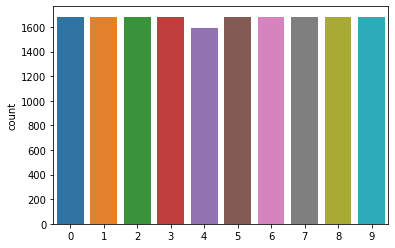

In [18]:
import seaborn as sns
sns.countplot(y_train)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


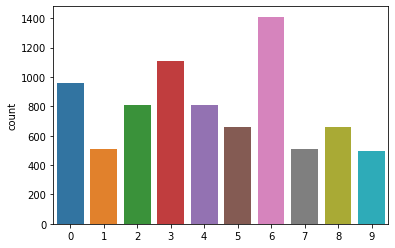

In [19]:
sns.countplot(y_test)

max length :  2106
average length :  262.97975031360136


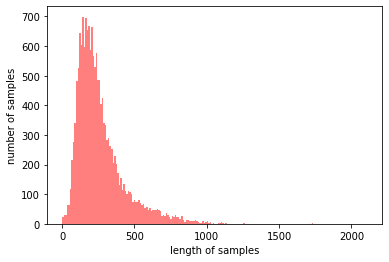

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
# 길이 분포 확인
print('max length : ', max(len(i) for i in X_train))
print('average length : ', sum(map(len, X_train))/len(X_train))

plt.hist([len(s) for s in X_train], bins=200, alpha=0.5, color='r')
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

max length :  2404
average length :  257.43103883005546


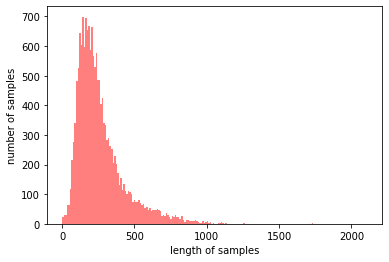

In [21]:
# 길이 분포 확인
print('max length : ', max(len(i) for i in X_test))
print('average length : ', sum(map(len, X_test))/len(X_test))

plt.hist([len(s) for s in X_train], bins=200, alpha=0.5, color='r')
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [22]:
# 전체 샘플 중 길이가 max_len이하인 샘플의 비율이 몇 %인지 확인하는 함수
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [23]:
below_threshold_len(500, X_train)
below_threshold_len(500, X_test)

전체 샘플 중 길이가 500 이하인 샘플의 비율: 90.80102741771698
전체 샘플 중 길이가 500 이하인 샘플의 비율: 91.4649520927887


In [24]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
FIX_LEN = 500
X_train = pad_sequences(X_train, FIX_LEN)
print('X_train -------------------------------------------')
for v in X_train[:5]:
  print(v)

X_test = pad_sequences(X_test, FIX_LEN)
print('X_test -------------------------------------------')
for v in X_test[:5]:
  print(v)

X_train -------------------------------------------
[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0    11   509  1830  1307
  8134   126   622   147    36  1781    12     3    73    45   144   163
    11   509  1830  1307  8134   126   622     8    10   867    64    30
   509   540     2   385     8    10    69     2   236    62     7   427

In [38]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding, Dense, LSTM, RNN, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

gpus = tf.config.experimental.list_physical_devices(device_type='GPU')
print(gpus)
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [26]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size,
                    input_length=FIX_LEN,
                    output_dim=128,
                    mask_zero=True))
model.add(LSTM(128))
model.add(Dense(10, activation='softmax'))


model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 128)          2208640   
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 10)                1290      
                                                                 
Total params: 2,341,514
Trainable params: 2,341,514
Non-trainable params: 0
_________________________________________________________________


In [27]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(16741, 500)
(16741,)
(7932, 500)
(7932,)


In [34]:
s = np.arange(X_train.shape[0])
np.random.shuffle(s)

X_train = X_train[s]
y_train = y_train[s]

In [35]:
model_checkpoint_callback = ModelCheckpoint('/content/drive/MyDrive/학교자료/4-2/정보검색/팀프로젝트/best_model_balanced.h5',
                                            monitor='val_accuracy',
                                            mode='max',
                                            verbose=1,
                                            save_best_only=True
)

history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=100,
                    validation_split=0.2,
                    callbacks=[model_checkpoint_callback])

Epoch 1/20
134/134 [==============================] - ETA: 0s - loss: 1.2397 - accuracy: 0.6638
Epoch 00001: val_accuracy improved from -inf to 0.67931, saving model to /content/drive/MyDrive/학교자료/4-2/정보검색/팀프로젝트/best_model_balanced.h5
134/134 [==============================] - 220s 2s/step - loss: 1.2397 - accuracy: 0.6638 - val_loss: 1.0389 - val_accuracy: 0.6793
Epoch 2/20
134/134 [==============================] - ETA: 0s - loss: 0.9206 - accuracy: 0.7021
Epoch 00002: val_accuracy did not improve from 0.67931
134/134 [==============================] - 221s 2s/step - loss: 0.9206 - accuracy: 0.7021 - val_loss: 1.1328 - val_accuracy: 0.6503
Epoch 3/20
134/134 [==============================] - ETA: 0s - loss: 0.7692 - accuracy: 0.7464
Epoch 00003: val_accuracy did not improve from 0.67931
134/134 [==============================] - 222s 2s/step - loss: 0.7692 - accuracy: 0.7464 - val_loss: 1.0308 - val_accuracy: 0.6703
Epoch 4/20
134/134 [============================

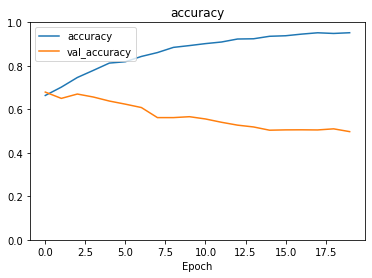

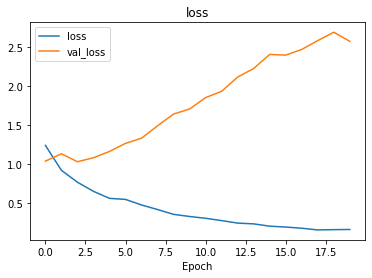

In [36]:
# plot
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.xlabel('Epoch')
plt.ylim(0, 1)
plt.legend(['accuracy', 'val_accuracy'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.xlabel('Epoch')
# plt.ylim(0, 1)
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

In [37]:
# 테스트 데이터로 정확도 측정
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/학교자료/4-2/정보검색/팀프로젝트/best_model_balanced.h5')
loaded_model.evaluate(X_test, y_test, verbose=1)

from sklearn.metrics import classification_report

y_pred = loaded_model.predict(X_test, batch_size=1000, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

8/8 [==============================] - 4s 300ms/step
              precision    recall  f1-score   support

           0       0.55      0.66      0.60       960
           1       0.14      0.14      0.14       510
           2       0.35      0.42      0.38       810
           3       0.18      0.02      0.04      1110
           4       0.32      0.34      0.33       810
           5       0.28      0.31      0.29       659
           6       0.22      0.12      0.16      1410
           7       0.12      0.21      0.15       509
           8       0.13      0.20      0.16       659
           9       0.15      0.26      0.19       495

    accuracy                           0.26      7932
   macro avg       0.24      0.27      0.24      7932
weighted avg       0.26      0.26      0.25      7932



```
{
  'Hip-Hop': 0,
  'Indie': 1,
  'Metal': 2,
  'Pop': 3,
  'Country': 4,
  'Jazz': 5,
  'Rock': 6,
  'R&B': 7,
  'Electronic': 8,
  'Folk': 9
}
```

# dropout


In [39]:
from keras.regularizers import l2
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(Embedding(input_dim=vocab_size,
                    input_length=FIX_LEN,
                    output_dim=128,
                    mask_zero=True))
model.add(LSTM(128, 
               kernel_regularizer=l2(0.001)))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))


model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 128)          2208640   
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2,341,514
Trainable params: 2,341,514
Non-trainable params: 0
_________________________________________________________________


In [42]:
model_checkpoint_callback = ModelCheckpoint('/content/drive/MyDrive/학교자료/4-2/정보검색/팀프로젝트/best_model_balanced_dropout.h5',
                                            monitor='val_accuracy',
                                            mode='max',
                                            verbose=1,
                                            save_best_only=True
)

history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=100,
                    validation_split=0.2,
                    callbacks=[model_checkpoint_callback])

Epoch 1/20
134/134 [==============================] - ETA: 0s - loss: 2.2680 - accuracy: 0.1782
Epoch 00001: val_accuracy improved from -inf to 0.13377, saving model to /content/drive/MyDrive/학교자료/4-2/정보검색/팀프로젝트/best_model_balanced_dropout.h5
134/134 [==============================] - 228s 2s/step - loss: 2.2680 - accuracy: 0.1782 - val_loss: 2.3182 - val_accuracy: 0.1338
Epoch 2/20
134/134 [==============================] - ETA: 0s - loss: 2.2539 - accuracy: 0.1706
Epoch 00002: val_accuracy improved from 0.13377 to 0.18662, saving model to /content/drive/MyDrive/학교자료/4-2/정보검색/팀프로젝트/best_model_balanced_dropout.h5
134/134 [==============================] - 225s 2s/step - loss: 2.2539 - accuracy: 0.1706 - val_loss: 2.2262 - val_accuracy: 0.1866
Epoch 3/20
134/134 [==============================] - ETA: 0s - loss: 2.1433 - accuracy: 0.2274
Epoch 00003: val_accuracy improved from 0.18662 to 0.23589, saving model to /content/drive/MyDrive/학교자료/4-2/

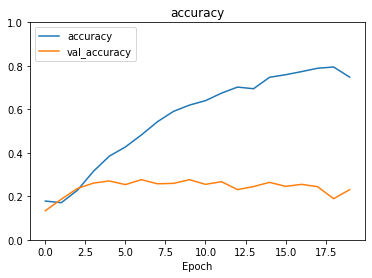

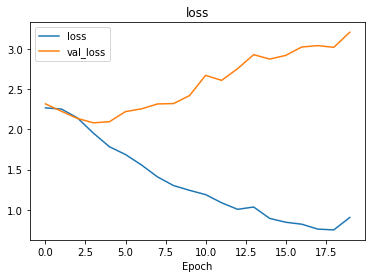

In [43]:
# plot
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.xlabel('Epoch')
plt.ylim(0, 1)
plt.legend(['accuracy', 'val_accuracy'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.xlabel('Epoch')
# plt.ylim(0, 1)
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

In [44]:
# 테스트 데이터로 정확도 측정
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/학교자료/4-2/정보검색/팀프로젝트/best_model_balanced_dropout.h5')
loaded_model.evaluate(X_test, y_test, verbose=1)

from sklearn.metrics import classification_report

y_pred = loaded_model.predict(X_test, batch_size=1000, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

8/8 [==============================] - 4s 301ms/step
              precision    recall  f1-score   support

           0       0.62      0.64      0.63       960
           1       0.12      0.14      0.13       510
           2       0.42      0.62      0.50       810
           3       0.25      0.07      0.11      1110
           4       0.30      0.27      0.28       810
           5       0.22      0.37      0.27       659
           6       0.26      0.06      0.10      1410
           7       0.12      0.34      0.18       509
           8       0.15      0.13      0.14       659
           9       0.19      0.23      0.21       495

    accuracy                           0.28      7932
   macro avg       0.26      0.29      0.25      7932
weighted avg       0.29      0.28      0.26      7932

